In [258]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [287]:
df = pd.read_csv('/Users/e5pianos/Desktop/2020 SPRING/COMP4641/project/ALL.csv')
df = df[pd.notnull(df['label'])]

dft = pd.read_csv('/Users/e5pianos/Desktop/2020 SPRING/COMP4641/project/m_hotWeather_90to99.csv')

In [288]:
df['full_text'].apply(lambda x: len(x.split(' '))).sum()
dft['full_text'].apply(lambda x: len(x.split(' '))).sum()

73994

22643

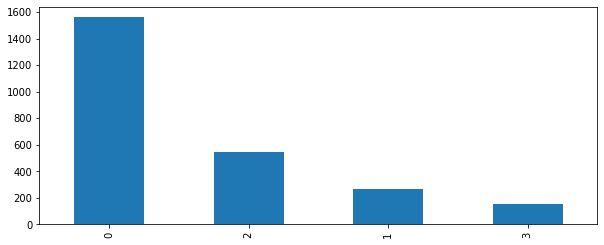

In [289]:
#statstic of classes
my_tags = ['0','1','2','3']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [290]:
def print_plot(index):
    example = df[df.index == index][['full_text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
#testing
print_plot(30)

this is an attempt of the foolish liberal media to restrict our freedom with nonsense rules and bs : yesterday suntrust banks were closed  you cannot get your cash ! The coronavirus numbers are based on models  like the climate change which gave us all dead by yesterday _Ù_¨_Ù_¨_Ù_¨ https://t.co/D0CosXiKxE
Label: 2


In [291]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [292]:
df['full_text'] = df['full_text'].apply(clean_text)
dft['full_text'] = dft['full_text'].apply(clean_text)
print_plot(10)

rt taslimanasreen community transmission coronavirus warm countries limited hot humid climate
Label: 3


In [293]:
df['full_text'].apply(lambda x: len(x.split(' '))).sum()
dft['full_text'].apply(lambda x: len(x.split(' '))).sum()

51756

15330

In [294]:
X = df.full_text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
#X_train=df.full_text
#y_train=df.label
#X_test=dft.full_text
#y_test=[]


In [295]:
####Naive Bayes classifier for multinomial models

In [296]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [297]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)
idx=0
for i in X_test:
    print(y_pred[idx],i)
    idx=idx+1

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

0 rt ictbizkseminoff craig douglas ictbiz_broy eyepopping impact #covid19 #coronavirus wichita hotels worker_
0 _the trump led republican fail shortage #coronavirus testing us leaves everyone exposed like duh _ #weather #hotel #travel #kentucky #missouri #mapoli #medicalcannabis #thursdaymotivation #thursdaythoughts #golfer #doctor #nurse #manhattan https tco rd6ntud9bx
0 bbcr4today know coronavirus hotspots wont find uk governments jolly hockey sticks press briefings coronavirus uk tracker https tco v4yo8n5nkl #coronavirus epidemic spreading rapidly throughout uk bbc5live #r4today #covid19
0 cwlcollins waterage lighterage tug supporter cheered us passing studio playing always look bright side life full volume absolutely brilliant #riverthamesphotographer #londonphotographer #covid19 #coronavirus https tco 5tr7i5eeei
0 captured amazing screenshot 45 mins air travel us eu cut planes heading back home probably mostly empty 1 plane shown coming us eu #avgeek #covid19 #pandemic #airlines #

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [91]:
########Linear support vector machine

In [92]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [93]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8511198945981555
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       464
           1       0.77      0.48      0.59        85
           2       0.90      0.83      0.86       171
           3       0.82      0.23      0.36        39

    accuracy                           0.85       759
   macro avg       0.83      0.63      0.68       759
weighted avg       0.85      0.85      0.83       759



In [94]:
########Logistic regression -- hot weather rumor

In [298]:
from sklearn.linear_model import LogisticRegression
X_train=df.full_text
y_train=df.label

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [299]:
X_test=dft.full_text
y_pred = logreg.predict(X_test)
idx=0
for i in X_test:
    print(y_pred[idx])
    idx=idx+1


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=my_tags))

0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
1
2
0
0
0
0
0
0
2
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
2
0
0
2
0
0
0
0
3
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
1
1
0
0
1
2
0
2
0
2
1
0
2
1
0
0
0
0
0
0
2
1
0
2
0
0
0
0
0
0
0
0
3
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
2
0
0
0
1
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
2
0
0
0
2
0
0
0
0
1
0
0
0
2
1
2
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
3
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
0
2
2
1
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
0
2
2
0
2
2
2
2
0
2
2
2
2
2
0
2
1
2
2
2
1
0
0
2
2
2
2
2
0
0
2
2
2
0
0
2
0
2
2
2
2
2
2
1
0
2
2
2
0
0
2
2
0
0
2
2
0
0
0
2
0
2
2
2
0
2
0
2
2
2
2
0
0
2
2
2
0
2
2
2
2
0
0
2
0
2
0
0
2
0
0
2
2
2
0
0
2
0
2
2
0
2
0
2
2
0
0
2
2
0
2
0
2
2
2
2
2
2
2
2
0
1
2
2
2
0
2
0
2
2
2
0
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
0
2
1
0
0
2
2
0
2
2
2
2
2
2
0
2
2


In [97]:
###Word2vec embedding and Logistic Regression

In [165]:
from gensim.models import Word2Vec
from gensim import models
import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("/Users/e5pianos/Desktop/2020 SPRING/COMP4641/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [168]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))
import nltk

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean
def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['full_text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['full_text']), axis=1).values

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [169]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).



In [170]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_tags))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



accuracy 0.8023715415019763
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       464
           1       0.54      0.61      0.57        85
           2       0.82      0.85      0.83       171
           3       0.29      0.31      0.30        39

    accuracy                           0.80       759
   macro avg       0.64      0.66      0.65       759
weighted avg       0.81      0.80      0.81       759



In [ ]:
###BOW with keras

In [100]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [101]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 1770
Test size: 759


In [102]:
train_posts = df['full_text'][:train_size]
train_tags = df['label'][:train_size]

test_posts = df['full_text'][train_size:]
test_tags = df['label'][train_size:]

In [103]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [104]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


LabelEncoder()

x_train shape: (1770, 1000)
x_test shape: (759, 1000)
y_train shape: (1770, 4)
y_test shape: (759, 4)


In [105]:
batch_size = 32
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 1593 samples, validate on 177 samples
Epoch 1/20
1593/1593 [==============================] - 1s 318us/step - loss: 0.7699 - accuracy: 0.7558 - val_loss: 0.9942 - val_accuracy: 0.6271
Epoch 2/20
1593/1593 [==============================] - 0s 258us/step - loss: 0.4278 - accuracy: 0.8575 - val_loss: 0.8349 - val_accuracy: 0.6610
Epoch 3/20
1593/1593 [==============================] - 0s 207us/step - loss: 0.3302 - accuracy: 0.9002 - val_loss: 0.8404 - val_accuracy: 0.6780
Epoch 4/20
1593/1593 [==============================] - 0s 234us/step - loss: 0.2496 - accuracy: 0.9284 - val_loss: 0.8553 - val_accuracy: 0.6667
Epoch 5/20
1593/1593 [==============================] - 0s 198us/step - loss: 0.1962 - accuracy: 0.9416 - val_loss: 0.8846 - val_accuracy: 0.6667
Epoch 6/20
1593/1593 [==============================] - 0s 177us/step - loss: 0.1554 - accuracy: 0.9542 - val_loss: 0.9032 - val_accuracy: 0.6554
Epoch 7/20
1593/1593 [==============================] - 0s 233us/step - loss:

In [107]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

759/759 [==============================] - 0s 58us/step
Test accuracy: 0.8208168745040894


In [67]:
##Doc2vec and Logistic Regression

In [179]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import doc2vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
import gensim

In [180]:

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df.full_text, df.label, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [182]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

/anaconda3/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning:

C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.

100%|██████████| 2529/2529 [00:00<00:00, 762682.97it/s]


In [184]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2529/2529 [00:00<00:00, 626803.45it/s]
/anaconda3/lib/python3.7/site-packages/gensim/models/word2vec.py:455: RuntimeWarning:

overflow encountered in add

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:1203: RuntimeWarning:

invalid value encountered in multiply

100%|██████████| 2529/2529 [00:00<00:00, 1337966.05it/s]


In [185]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [186]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [196]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [197]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [198]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.48089591567852435
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       468
           1       0.14      0.19      0.16        75
           2       0.28      0.31      0.30       164
           3       0.07      0.06      0.06        52

    accuracy                           0.48       759
   macro avg       0.29      0.30      0.29       759
weighted avg       0.50      0.48      0.49       759

